In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#There are deleted users among these votes. To Take into account only active users refer to  ExploratoryPlotsByGroups.ipynb
votes = pd.DataFrame.from_csv('c:/Users/Joel/Predictive-model-for-the-voting-system-in-SE-network/spanish_site/AnsVotes_TSeries.csv', index_col=None)
votes.head()

,QuestionId,AnsId,Age_vot,AnsWordCount,AcceptedAnsId,QScore,QVotes,Score,Votes,Upvotes,...,CumScore,ReScore,QReScore,Comments,AnsRank,ReScore_rank,Ans_count,Pbias,DRank,EPbias
0,1,56,0,201,56,0,0,2,2,2,...,0,0,0,0,1,1,1,1,0,1
1,2,10,0,145,10,0,0,3,3,3,...,0,0,0,0,1,1,1,1,0,1
2,2,10,0,145,10,0,0,3,3,3,...,0,0,0,0,1,1,1,1,0,1
3,3,9,0,25,109,0,0,4,4,4,...,0,0,0,0,1,1,1,1,0,1
4,7,16,0,45,2977,0,0,3,3,3,...,0,0,0,0,1,1,1,1,0,1


In [3]:
# Little test
votes[(votes.Upvotes.isnull())|(votes.Downvotes.isnull())]

,QuestionId,AnsId,Age_vot,AnsWordCount,AcceptedAnsId,QScore,QVotes,Score,Votes,Upvotes,...,CumScore,ReScore,QReScore,Comments,AnsRank,ReScore_rank,Ans_count,Pbias,DRank,EPbias


In [4]:
votes[votes.Votes != (votes.Upvotes+votes.Downvotes)]

,QuestionId,AnsId,Age_vot,AnsWordCount,AcceptedAnsId,QScore,QVotes,Score,Votes,Upvotes,...,CumScore,ReScore,QReScore,Comments,AnsRank,ReScore_rank,Ans_count,Pbias,DRank,EPbias


In [5]:
votes.columns

Index([u'QuestionId', u'AnsId', u'Age_vot', u'AnsWordCount', u'AcceptedAnsId',
       u'QScore', u'QVotes', u'Score', u'Votes', u'Upvotes', u'Downvotes',
       u'CumVotes', u'CumScore', u'ReScore', u'QReScore', u'Comments',
       u'AnsRank', u'ReScore_rank', u'Ans_count', u'Pbias', u'DRank',
       u'EPbias'],
      dtype='object')

In [6]:
votes['Norm_DRank'] = votes['DRank']/votes['Ans_count']
votes['Norm_Pos'] = votes['AnsRank']/votes['Ans_count']

In [7]:
votes.shape

(23328, 24)

### Distribution of : number of days an answer is voted on (at least one vote)

In [8]:
votes.groupby('AnsId').count().Age_vot.value_counts().head(10)

1     1638
2     1405
3      740
4      598
6      292
5      217
8      153
12      97
10      71
9       62
Name: Age_vot, dtype: int64

# Regression happens on votes the day after attributes were measured

In [9]:
import itertools

new_idx_start = votes.shape[0]
get_idx = itertools.count(new_idx_start)

get_null_row = lambda df,ans_c,a_id: pd.DataFrame({'AnsId':[a_id],'Age_vot':[-1],'Norm_Pos':[1],'Norm_DRank':[0.0],'Ans_count':[ans_c],
                                       'ReScore':[0.0],'AnsRank':[ans_c],'Votes':[0],'Upvotes':[0],'Downvotes':[0]},index=[get_idx.next()])
append_null_day = lambda df: get_null_row(df,df.sort_values(by='Age_vot').Ans_count.iloc[0],df.AnsId.iloc[0]).append(df)
votes = votes.groupby(['AnsId']).apply(append_null_day).reset_index(level=[0],drop=True)
votes.loc[:,'Age_vot'] = votes['Age_vot'] + 1
votes.head(15)

,AcceptedAnsId,Age_vot,AnsId,AnsRank,AnsWordCount,Ans_count,Comments,CumScore,CumVotes,DRank,...,Pbias,QReScore,QScore,QVotes,QuestionId,ReScore,ReScore_rank,Score,Upvotes,Votes
23329,NaN,0,4,2,NaN,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0,0
7132,56,1,4,2,190,2,0,0,0,0,...,0.500000,0.000000,0,0,1,0.000000,2,1,2,3
21434,56,1437,4,3,190,6,2,1,3,-2,...,0.333333,0.923077,12,12,1,0.250000,5,1,1,1
23330,NaN,0,5,3,NaN,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0,0
13998,56,1,5,3,37,3,0,0,0,0,...,0.333333,0.000000,0,0,1,0.000000,3,1,1,1
20327,56,109,5,5,37,5,1,1,1,2,...,0.200000,0.923077,12,12,1,0.500000,3,-1,0,1
23331,NaN,0,6,5,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0,0
20328,10,1,6,5,51,5,0,0,0,0,...,0.200000,0.000000,0,0,2,0.000000,5,1,1,1
23332,NaN,0,8,4,NaN,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0,0
19213,10,1,8,3,46,4,0,0,0,2,...,0.333333,0.000000,0,0,2,0.000000,1,1,1,1


In [10]:
atts = ['Age_vot','Norm_Pos','Norm_DRank','Ans_count','ReScore','AnsRank']
select = lambda df,one_vote=True: df[atts + ['Votes','Upvotes','Downvotes']] if one_vote else df[atts]
shift = lambda df,att : df[att].shift(-1)#.ffill()
shift_select = lambda df: select(df) if df.shape[0]==1 else pd.concat([select(df,one_vote=False),shift(df,'Votes'),shift(df,'Upvotes'),shift(df,'Downvotes')],axis=1)
shift_votes = lambda df: shift_select(df.sort_values(by='Age_vot'))

votes = votes.groupby(['AnsId']).apply(shift_votes).reset_index(level=[0],drop=False)
votes = votes[(votes.Upvotes.notnull())|(votes.Downvotes.notnull())|(votes.Votes.notnull())] #drop last registered day for each ans


In [12]:
votes[votes.isnull().any(axis=1)]

,AnsId,Age_vot,Norm_Pos,Norm_DRank,Ans_count,ReScore,AnsRank,Votes,Upvotes,Downvotes


In [14]:
votes.shape #shape should be the same, we add a row and drop a row per ans

(23328, 10)

In [15]:
votes.groupby('AnsId').count().Age_vot.value_counts().head(15)

1     1638
2     1405
3      740
4      598
6      292
5      217
8      153
12      97
10      71
9       62
7       45
16      31
18      28
15      25
24      25
Name: Age_vot, dtype: int64

In [16]:
votes[votes.Votes != (votes.Upvotes+votes.Downvotes)]

,AnsId,Age_vot,Norm_Pos,Norm_DRank,Ans_count,ReScore,AnsRank,Votes,Upvotes,Downvotes


# Exploratory plots

# Group predictors

In [24]:
def get_intervals(att,quantiles):
    qtls = votes[att].quantile(quantiles).values
    return dict(zip(zip(qtls,qtls[1:]),[e for e in range(len(zip(qtls,qtls[1:])))]))
    
def get_group(intervals,pred):
    for l,u in intervals:
        if l<=pred and pred<u:
            return intervals[(l,u)]
        
def reverse_groups(groups,unit='days'):
    if unit == 'Rel Score':
        return {groups[(d1,d2)]:"[%.2f - %.2f[ %s"%(d1,d2,unit) for d1,d2 in groups}
    elif unit in ['Position','Nbr Ans Per Question']:
        return {groups[(d1,d2)]:"[%d - %d[ %s"%(d1,d2,unit) for d1,d2 in groups} 
    else:
        return {groups[(d1,d2)]:"%d to %d %s"%(d1,d2,unit) for d1,d2 in groups}

In [68]:
from functools import partial

age_intervals = get_intervals('Age_vot',[0,.25,.5,.65,.8,.9,1.0])
pos_intervals = get_intervals('AnsRank',[0,.75,.85,.95,1.0])
rscore_intervals = get_intervals('ReScore',[0,.1,.5,.75,1.0])
anscount_intervals = get_intervals('Ans_count',[0,.5,.6,.8,1.0])


In [69]:
votes['Age_vot_group'] = votes['Age_vot'].apply(partial(get_group,age_intervals))
votes['AnsRank_group'] = votes['AnsRank'].apply(partial(get_group,pos_intervals))
votes['ReScore_group'] = votes['ReScore'].apply(partial(get_group,rscore_intervals))
votes['Ans_count_group'] = votes['Ans_count'].apply(partial(get_group,anscount_intervals))

In [70]:
ReverseGroups = {}
ReverseGroups['Age_vot_group'] = reverse_groups(age_intervals)
ReverseGroups['AnsRank_group'] = reverse_groups(pos_intervals,unit='Position')
ReverseGroups['ReScore_group'] = reverse_groups(rscore_intervals,unit='Rel Score')
ReverseGroups['Ans_count_group'] = reverse_groups(anscount_intervals,unit='Nbr Ans Per Question')

In [71]:
ReverseGroups['Age_vot_group']

{0: '0 to 1 days',
 1: '1 to 3 days',
 2: '3 to 9 days',
 3: '9 to 163 days',
 4: '163 to 710 days',
 5: '710 to 1505 days'}

In [29]:
ReverseGroups['AnsRank_group']

{0: '[1 - 2[ Position',
 1: '[2 - 3[ Position',
 2: '[3 - 4[ Position',
 3: '[4 - 12[ Position'}

In [30]:
ReverseGroups['ReScore_group']

{0: '[-0.86 - 0.00[ Rel Score',
 1: '[0.00 - 0.50[ Rel Score',
 2: '[0.50 - 0.83[ Rel Score',
 3: '[0.83 - 0.98[ Rel Score'}

In [32]:
ReverseGroups['Ans_count_group']

{0: '[1 - 2[ Nbr Ans Per Question',
 1: '[2 - 2[ Nbr Ans Per Question',
 2: '[2 - 3[ Nbr Ans Per Question',
 3: '[3 - 12[ Nbr Ans Per Question'}

In [72]:
votes.loc[votes.ReScore_group.isnull(),'ReScore_group'] = 3

In [73]:
votes.loc[votes.ReScore_group.isnull()]

,AnsId,Age_vot,Norm_Pos,Norm_DRank,Ans_count,ReScore,AnsRank,Votes,Upvotes,Downvotes,Age_vot_group,AnsRank_group,ReScore_group,Ans_count_group


# Group Plots

In [74]:
from itertools import product
def plot_by(filtered_df,row_att_n, col_att_n,xpred_n,ypred_n,xfsize,yfsize,verbose=False,errbars=False):
    plt.figure(figsize=(xfsize,yfsize))
    
    row_group_name = row_att_n+'_group'
    col_group_name = col_att_n+'_group'
    
    groups = filtered_df.sort_values(by=['Age_vot']).groupby([row_group_name,col_group_name])
    
    n_rows,n_cols = len(filtered_df[row_group_name].unique()),len(filtered_df[col_group_name].unique())
    sort_rows = {e:i for i,e in enumerate(filtered_df[row_group_name].sort_values().unique())}
    sort_cols = {e:i for i,e in enumerate(filtered_df[col_group_name].sort_values().unique())}
    
    to_cover = list(product([sort_rows[e] for e in sort_rows],[sort_cols[e]+1 for e in sort_cols]))
    axref = plt.subplot(1,n_cols,1)
    
    for key,group in groups:
        to_cover.remove((sort_rows[group[row_group_name].iloc[0]],sort_cols[group[col_group_name].iloc[0]]+1))
        #Convention: row index starts at 0, col index starts at 1
        rw_g = sort_rows[group[row_group_name].iloc[0]] 
        col_g = sort_cols[group[col_group_name].iloc[0]] + 1
        if verbose:
            print 'rw_g %d'%rw_g, 'col_g %d'%col_g
            print 'rl_rw_g %d'%group[row_group_name].iloc[0], 'rl_col_g %d'%group[col_group_name].iloc[0]
            print 
        ax = plt.subplot(1, n_cols, col_g ,sharex=axref,sharey=axref)
        
        get_rates = lambda df: np.mean(df[ypred_n]/(df.Age_vot-df.Age_vot.shift(1).fillna(0) + .5))#(max_rate(df) - min_rate(df))
        get_sdev = lambda df : np.std(df[ypred_n]/(df.Age_vot-df.Age_vot.shift(1).fillna(0) + .5))
        vote_rates = group.groupby([xpred_n]).apply(get_rates)
        std_vtrates = group.groupby([xpred_n]).apply(get_sdev)
        
        if not errbars:
            std_vtrates = np.array([0 for _ in range(len(std_vtrates))])
        
        row_g_name = '%s'%(ReverseGroups[row_group_name][group[row_group_name].iloc[0]])
        plt.errorbar(x = vote_rates.index.values,y=vote_rates.values,yerr=std_vtrates,fmt='-o',label=row_g_name)
        
        if col_g==len(sort_cols):
        
            # Put a legend to the right of the current axis
            ax.legend(loc='center left',bbox_to_anchor=(1, .5))
            
        if col_g==1:
            plt.ylabel('Mean_%s_rate'%ypred_n)
            plt.xlabel(xpred_n)
        
        if rw_g==0:
            plt.title('%s'%(ReverseGroups[col_group_name][group[col_group_name].iloc[0]]))
    print to_cover
    for rw,col in to_cover:
        plt.subplot(1, n_cols, col ,sharex=axref,sharey=axref)
        if rw==0:
            plt.title('%s'%(ReverseGroups[col_group_name][[e for e,i in sort_cols.items() if i == col-1][0]]))
    #plt.suptitle('X=%s, Y=%s'%(xpred_n,ypred_n),fontsize=20,y=1.08)
    plt.show()

[]


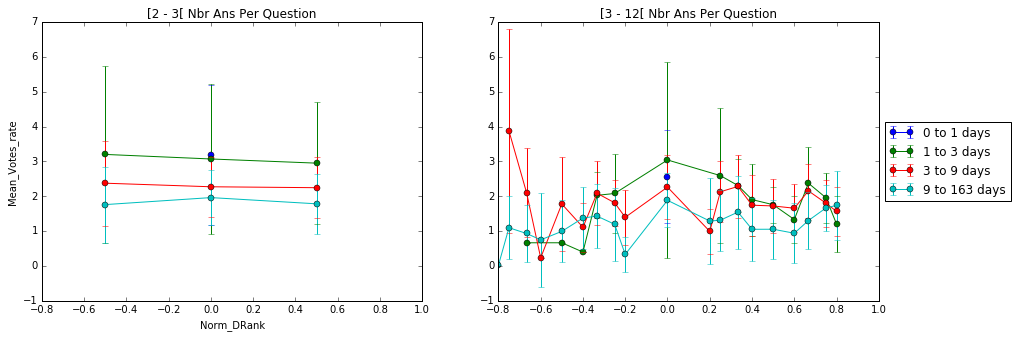

In [53]:
nb_ans = 5
nb_age_groups = 4
data = votes[(votes.Ans_count>1)] #&(votes.Age_vot_group==2)]
data = data[(data['Ans_count']<=nb_ans)&(data['Age_vot_group']<=nb_age_groups-1)]
plot_by(data,'Age_vot','Ans_count','Norm_DRank','Votes',15,5,errbars=True)

[]


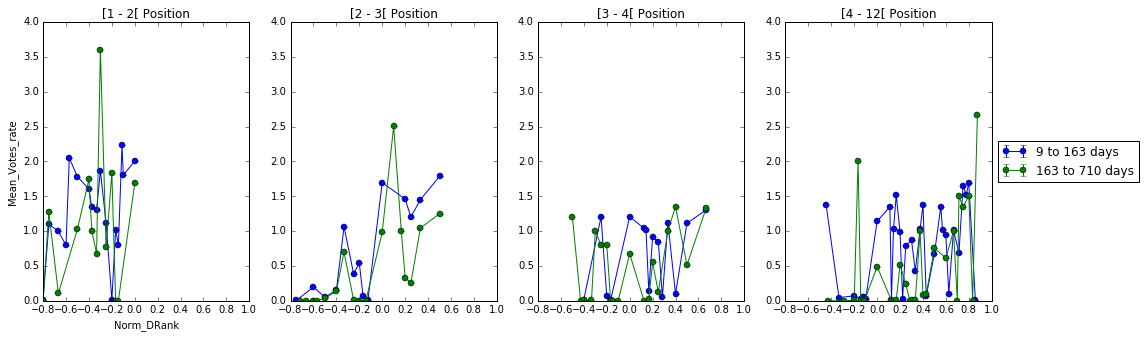

In [76]:
nb_ans = 10
nb_age_groups = 5
data = votes[(votes.Ans_count>1)&(votes.Age_vot_group>2)]#&(votes.Age_vot_group==3)]
data = data[(data['Ans_count']<=nb_ans)&(data['Age_vot_group']<=nb_age_groups-1)]
plot_by(data,'Age_vot','AnsRank','Norm_DRank','Votes',17,5,errbars=False)

[(0, 1), (0, 3), (0, 4)]


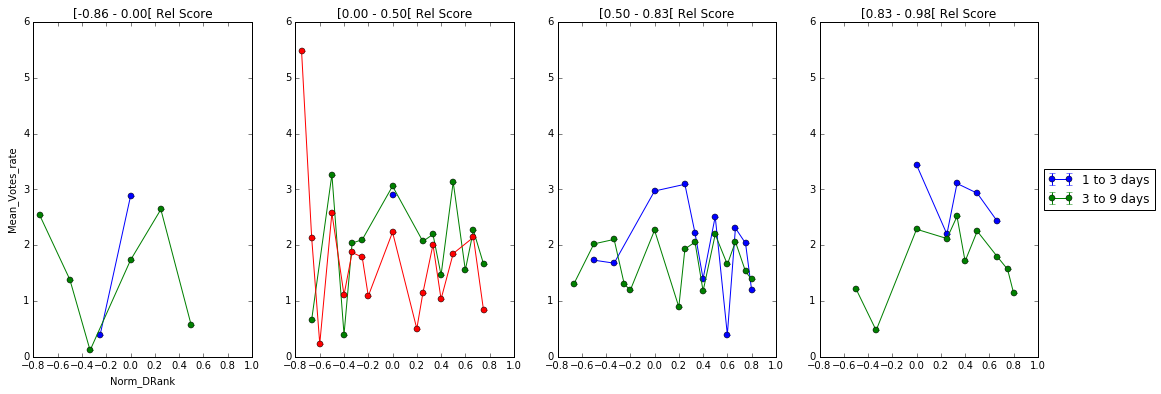

In [60]:
nb_ans = 5
nb_age_groups = 3

data = votes[(votes.Ans_count>1)]
data = data[(data['Ans_count']<=nb_ans)&(data['Age_vot_group']<=nb_age_groups-1)]

plot_by(data,'Age_vot','ReScore','Norm_DRank','Votes', 18, 6, errbars=False)

## Regression analysis

In [182]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [183]:
votes['Norm_Pos'] = votes['AnsRank']/votes['Ans_count']
votes['Norm_Pos_2'] = np.square(votes['Norm_Pos'])

In [184]:
fml_1 = 'Votes ~ Norm_DRank'
r_method = sm.families.NegativeBinomial(link=sm.families.links.log)#sm.families.Poisson(link=sm.families.links.log)
datas_1 = votes
mod_1 = smf.glm(fml_1, data=datas_1, family=r_method) #, offset=np.log(datas['Age_vot'] + 1))
rslt_1 = mod_1.fit(method='bfgs')

rslt_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Votes   No. Observations:                19389
Model:                            GLM   Df Residuals:                    19387
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    log   Scale:                  0.241111324353
Method:                          IRLS   Log-Likelihood:                -30733.
Date:                Thu, 28 Apr 2016   Deviance:                       2517.0
Time:                        14:53:50   Pearson chi2:                 4.67e+03
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2828      0.005     59.367      0.000         0.273     0.292
Norm_DRank    -0.1275      0.019     -6.656      0.000        -0.165    -0.090
==============================================================================
"""

In [185]:
fml_2 = 'Votes ~ Norm_Pos*ReScore + Norm_Pos_2*ReScore + Norm_Pos*Norm_DRank + Norm_Pos_2*Norm_DRank'
r_method = sm.families.NegativeBinomial(link=sm.families.links.log)#sm.families.Poisson(link=sm.families.links.log)
datas_2 = votes
mod_2 = smf.glm(fml_2, data=datas_2, family=r_method) #, offset=np.log(datas['Age_vot'] + 1))
rslt_2 = mod_2.fit(method='bfgs')

rslt_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Votes   No. Observations:                19389
Model:                            GLM   Df Residuals:                    19380
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    log   Scale:                  0.186615244235
Method:                          IRLS   Log-Likelihood:                -30574.
Date:                Thu, 28 Apr 2016   Deviance:                       2198.9
Time:                        14:53:53   Pearson chi2:                 3.62e+03
No. Iterations:                     7                                         
=========================================================================================
                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 1.4352      0.096     14.921      0.000         1.247     1.624
Norm_Pos                 -3.6031      0.292    -12.360      0.000        -4.174    -3.032
ReScore                  -1.3381      0.105    -12.721      0.000        -1.544    -1.132
Norm_Pos:ReScore          3.5500      0.335     10.593      0.000         2.893     4.207
Norm_Pos_2                2.6660      0.200     13.315      0.000         2.274     3.058
Norm_Pos_2:ReScore       -2.6004      0.239    -10.890      0.000        -3.068    -2.132
Norm_DRank                1.0770      0.140      7.668      0.000         0.802     1.352
Norm_Pos:Norm_DRank      -2.5150      0.444     -5.658      0.000        -3.386    -1.644
Norm_Pos_2:Norm_DRank     1.2397      0.323      3.834      0.000         0.606     1.873
=========================================================================================
"""

In [186]:
votes['Lhs'] = votes['Norm_Pos'] + votes['Norm_Pos_2']
votes['Rhs'] = votes['Norm_DRank'] + votes['ReScore']

In [187]:
fml_3 = 'Votes ~ Lhs + Rhs'
r_method = sm.families.NegativeBinomial(link=sm.families.links.log)#sm.families.Poisson(link=sm.families.links.log)
datas_3 = votes
mod_3 = smf.glm(fml_3, data=datas_3, family=r_method) #, offset=np.log(datas['Age_vot'] + 1))
rslt_3 = mod_3.fit(method='bfgs')

rslt_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Votes   No. Observations:                19389
Model:                            GLM   Df Residuals:                    19386
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    log   Scale:                  0.198364057791
Method:                          IRLS   Log-Likelihood:                -30609.
Date:                Thu, 28 Apr 2016   Deviance:                       2269.1
Time:                        14:54:02   Pearson chi2:                 3.85e+03
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2646      0.011     23.667      0.000         0.243     0.286
Lhs            0.0942      0.006     15.358      0.000         0.082     0.106
Rhs           -0.2497      0.008    -29.497      0.000        -0.266    -0.233
==============================================================================
"""

## Lm with mixed effects

In [207]:
formula = "Votes ~ Norm_DRank - 1"
model = sm.MixedLM.from_formula(formula, votes, groups=votes["AnsId"])
result = model.fit()
print result.summary()

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Votes      
No. Observations: 19389   Method:             REML       
No. Groups:       5577    Scale:              0.7449     
Min. group size:  1       Likelihood:         -29413.9915
Max. group size:  509     Converged:          Yes        
Mean group size:  3.5                                    
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Norm_DRank     -0.186    0.038 -4.872 0.000 -0.260 -0.111
Intercept RE    1.647    0.054                           

